In [2]:
import sys
print (sys.version)

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


# 0.Import Libraries and setup environment

In [3]:
# import libraries to work with
import numpy as np
import scipy as sp
import pandas as pd # lets us handle data as dataframes
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm # allows us easy access to colormaps
import matplotlib.pyplot as plt # sets up plotting under plt
import seaborn as sns # sets up styles and gives us more plotting options

# setup pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_column', None)
pd.set_option('display.max_row', 100)
pd.set_option('display.notebook_repr_html', True)
%matplotlib inline 

In [4]:
readcols = ['Investment', 'Ticker', 'Strategy', 'Quantity', 'ATH', 'Sell Target $', 'Target $', 'Current $', 'Current Price', 'Rank', 'Total Supply', 'CurrentMarketCap']
df = pd.read_excel ('D:\Dropbox\Crypto\CryptoDashboard.xlsx', sheet_name='DistributionChart', usecols = readcols)
df.columns = ['Name', 'Ticker', 'Strategy', 'Quantity', 'OldATH', 'SellPrice', 'SellTotalAmt', 'CurrentTotalAmt', 'CurrentPrice', 'cmcRank', 'CurrentTokenSupply', 'CurrentMarketCap']

In [6]:
df.head()
#df

,Name,Ticker,Strategy,Quantity,OldATH,SellPrice,SellTotalAmt,CurrentTotalAmt,CurrentPrice,cmcRank,CurrentTokenSupply,CurrentMarketCap
0,Ether,ETH,Hold: 0.11 BTC,16.78,1850.00,3500.0,58730.0,30656.273726,1826.953142,2,1.146852e+08,2.095245e+11
1,NEO,NEO,Hold,107.00,189.00,250.0,26750.0,4684.709997,43.782336,28,1.000000e+08,3.088355e+09
2,Dash,DASH,Hold: 1.1 ETH,10.00,1532.00,2000.0,20000.0,2536.614107,253.661411,34,9.975788e+06,2.530473e+09
3,Streamr,DATA,Hold till 3$,23330.00,0.37,3.0,69990.0,2639.280047,0.113128,198,9.871545e+08,9.376176e+07
4,Cardano,ADA,Hold,1500.00,1.29,3.5,5250.0,1351.981977,0.901321,4,4.500000e+10,2.804235e+10


# 2. Understand Data Structure and Values

In [ ]:
df.shape #tuple

In [8]:
df.shape[0], df.shape[1]

(43, 15)

In [70]:
df.columns #shows index

Index(['Name', 'Ticker', 'Strategy', 'Quantity', 'OldATH', 'SellPrice', 'SellTotalAmt', 'CurrentTotalAmt', 'CurrentPrice', 'cmcRank', 'CurrentTokenSupply', 'CurrentMarketCap'], dtype='object')

In [72]:
type(df.Quantity), type(df["CurrentPrice"]), type(df)

(pandas.core.series.Series,
 pandas.core.series.Series,
 pandas.core.frame.DataFrame)

In [73]:
# pd.set_option('display.max_row', 20)
df.dtypes
type(df.dtypes)
dfType = pd.DataFrame({'ColumnName':df.dtypes.index, 'ColumnDataType':df.dtypes.values})
dfType

,ColumnName,ColumnDataType
0,Name,object
1,Ticker,object
2,Strategy,object
3,Quantity,float64
4,OldATH,float64
5,SellPrice,float64
6,SellTotalAmt,float64
7,CurrentTotalAmt,float64
8,CurrentPrice,float64
9,cmcRank,int64


In [15]:
dfType['ColumnDataType'].value_counts()

float64    10
object      4
int64       1
Name: ColumnDataType, dtype: int64

In [74]:
df1 = df.describe(include=['number','object'])
df1.loc['dtype'] = df.dtypes
df1.loc['size'] = len(df)
df1.loc['nullcount'] = df.isnull().sum()
df1

,Name,Ticker,Strategy,Quantity,OldATH,SellPrice,SellTotalAmt,CurrentTotalAmt,CurrentPrice,cmcRank,CurrentTokenSupply,CurrentMarketCap
count,43,43,43,43,43,38,43,43,43,43,43,43
unique,43,43,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Storj,STORJ,Exit: Stop Loss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,723205,101.522,169.899,9497.33,1506.97,55.6663,363.442,4.25644e+11,6.96374e+09
std,NaN,NaN,NaN,2.9855e+06,362.552,645.002,15246.3,4641.18,279.103,503.267,1.91889e+12,3.19217e+10
min,NaN,NaN,NaN,5,1.8e-05,0.001,0,9.76091,1.75477e-05,2,0,0
25%,NaN,NaN,NaN,104.5,0.505,0.3,1097,181.806,0.0364109,62.5,1.18157e+08,3.24237e+07
50%,NaN,NaN,NaN,1600,1.75,1.75,4000,348.381,0.167712,170,9.38538e+08,1.26239e+08
75%,NaN,NaN,NaN,11500,14.7,10,9500,941.018,2.29752,491.5,2.49742e+09,9.82645e+08


# 3. Querying & EDA

In [77]:
(df["CurrentTotalAmt"] >= 1000).sum()

10

In [93]:
# Legends for Pie Chart for portfolio distribution of bigger coins
# legendcondlist = [(df["CurrentTotalAmt"] >= 1000)]
# legendchoicelist = [df["Ticker"]]
# df['Legend'] = np.select(legendcondlist,legendchoicelist,default='Other')
boundryValue = 1000
othersCount = (df['CurrentTotalAmt'] < boundryValue).sum()
df['Legend'] = np.where(df['CurrentTotalAmt'] >= boundryValue, df["Ticker"], 'Others ('+ str(othersCount) + ')')

df['NewATH'] = np.where(df['CurrentPrice'] > df['OldATH'], df['CurrentPrice'], df['OldATH'])
df['ATHdiff'] = (df['CurrentPrice'] - df['NewATH'])
df['%RiseNeeded'] = (df['ATHdiff'] / df['CurrentPrice'])*-1
df.head()

,Name,Ticker,Strategy,Quantity,OldATH,SellPrice,SellTotalAmt,CurrentTotalAmt,CurrentPrice,cmcRank,CurrentTokenSupply,CurrentMarketCap,Legend,NewATH,ATHdiff,%RiseNeeded
0,Ether,ETH,Hold: 0.11 BTC,16.78,1850.00,3500.0,58730.0,30656.273726,1826.953142,2,1.146852e+08,2.095245e+11,ETH,1850.00,-23.046858,0.012615
1,NEO,NEO,Hold,107.00,189.00,250.0,26750.0,4684.709997,43.782336,28,1.000000e+08,3.088355e+09,NEO,189.00,-145.217664,3.316809
2,Dash,DASH,Hold: 1.1 ETH,10.00,1532.00,2000.0,20000.0,2536.614107,253.661411,34,9.975788e+06,2.530473e+09,DASH,1532.00,-1278.338589,5.039547
3,Streamr,DATA,Hold till 3$,23330.00,0.37,3.0,69990.0,2639.280047,0.113128,198,9.871545e+08,9.376176e+07,DATA,0.37,-0.256872,2.270627
4,Cardano,ADA,Hold,1500.00,1.29,3.5,5250.0,1351.981977,0.901321,4,4.500000e+10,2.804235e+10,ADA,1.29,-0.388679,0.431232


In [94]:
data = df.groupby("Legend")["CurrentTotalAmt"].sum()
datacount = len(data) #len(df['Legend'].unique())
datacountfreq = df.groupby("Legend")["CurrentTotalAmt"].count()
data, datacount, datacountfreq

(Legend
 ADA             1351.981977
 CND             3628.063153
 DASH            2536.614107
 DATA            2639.280047
 ETH            30656.273726
 LTC             1085.810429
 NEO             4684.709997
 Others (33)    11849.731693
 TEL             3943.945905
 WAXP            1487.979157
 XRP             1140.423966
 Name: CurrentTotalAmt, dtype: float64,
 11,
 Legend
 ADA             1
 CND             1
 DASH            1
 DATA            1
 ETH             1
 LTC             1
 NEO             1
 Others (33)    33
 TEL             1
 WAXP            1
 XRP             1
 Name: CurrentTotalAmt, dtype: int64)

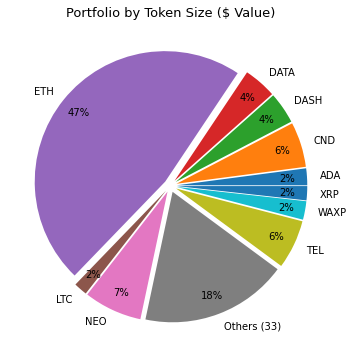

In [95]:
# data.plot.pie(autopct="%.0f%%");
pie, ax = plt.subplots(figsize=[10,6])
labels = data.keys()
plt.pie(x=data, autopct="%.0f%%", explode=[0.05]*datacount, labels=labels, pctdistance=0.85)
plt.title("Portfolio by Token Size ($ Value)", fontsize=13);
# #pie.savefig("DeliveryPieChart.png")

In [11]:
datakey = data.keys()
datakey

Index(['ADA', 'CND', 'DASH', 'DATA', 'ETH', 'LTC', 'NEO', 'Other', 'TEL', 'WAXP', 'XRP'], dtype='object', name='Legend')